In [ ]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#save the chinese directed hatespeech terms from hatebase.org as hatebase_vocab_chinese.csv in parallel
df_chinese = pd.read_csv("hatebase_vocab_chinese.csv")
#save the asian directed hatespeech terms from hatebase.org as hatebase_vocab_asian.csv in parallel
df_asian = pd.read_csv("hatebase_vocab_asian.csv")

new_filename = "hate_speech_covid_trend.csv"
#predownload and unzip the pol.csv from this url: https://archive.org/details/4plebs-org-data-dump-2020-01 datasource and save in parallel as pol.csv
pol_data = "pol.csv"

################################DONOTEDIT###########################################

df_total = pd.concat([df_chinese, df_asian])
list_hate = df_total["term"].to_list()
str_hate = ' | '.join(list_hate)
col_names = ["num", "subnum", "thread_num", "op", "timestamp", "timestamp_expired", "preview_orig", "preview_w", "preview_h", "media_filename", "media_w", "media_h", "media_size", "media_hash", "media_orig", "spoiler", "deleted", "capcode", "email", "name", "trip", "title", "comment", "sticky", "locked", "poster_hash", "poster_country", "exif."]
filename = pol_data
df = pd.read_csv(filename, error_bad_lines=False, chunksize = 1000000,warn_bad_lines = False, names = col_names)


for chunk in df:
    new_df = chunk[chunk['comment'].notna()]    
    cut_df = new_df.loc[new_df['comment'].str.contains(str_hate, case=False)]
    cut_df = cut_df[["thread_num","timestamp", "name", "title", "comment", "poster_country"]]
    if not os.path.isfile(new_filename):
        cut_df.to_csv(new_filename, header='column_names')
    else: # else it exists so append without writing the header
        cut_df.to_csv(new_filename, mode='a', header=False)




In [ ]:
historical_data = "hate_speech_covid_trend.csv"
newfilename = "edited_historical_trend.csv"
################################DONOTEDIT###########################################

big_df = pd.read_csv(historical_data)
big_df['datetime_cut'] = ''
for index, row in big_df.iterrows():
    temp_date = datetime.utcfromtimestamp(row["timestamp"]).strftime('%Y-%m-%d')
    row["datetime_cut"] = temp_date
    big_df.loc[index] = row
big_df.to_csv("")

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
#we are going to clean the file that we generated from the 4chan_api_crawler.py, name it "crawled_data.csv" and save it in parallel

data = "crawled_data.csv"
new_filename = "total_df_edited.csv"
#####################################################DONOT EDIT BELOW#################################################
pol_df = pd.read_csv(data)
pol_df['datetime_cut'] = ''
for index, row in pol_df.iterrows():
    temp_date = row["datetime"].split()[0]
    row["datetime_cut"] = temp_date
    pol_df.loc[index] = row


    
past_df = pd.read_csv("edited_historical_trend.csv")    
jan_df = past_df.loc[past_df["datetime_cut"].str.contains("2020")]
dec_df = past_df.loc[past_df["datetime_cut"].str.contains("2019-12")]

mini_total = pd.concat([jan_df, dec_df])
total_df = pd.concat([mini_total, pol_df])




    
vc_df = total_df["datetime_cut"].value_counts().to_csv("2019.csv")
vc_df = pd.read_csv("2019.csv")
vc_df = vc_df.rename(columns={"Unnamed: 0":"index", "datetime_cut": "count"})
vc_df["index"] = pd.to_datetime(vc_df["index"])
vc_df.to_csv(new_filename)

In [25]:
df = pd.read_csv("total_df_edited.csv")

In [26]:
print(df.head())
df["index"] = pd.to_datetime(df["index"])
print(df.head())

   Unnamed: 0       index  count
0           0  2020-05-04    423
1           1  2020-04-24    330
2           2  2020-05-01    326
3           3  2020-04-26    322
4           4  2020-04-25    320
   Unnamed: 0      index  count
0           0 2020-05-04    423
1           1 2020-04-24    330
2           2 2020-05-01    326
3           3 2020-04-26    322
4           4 2020-04-25    320


In [34]:
import itertools
from datetime import datetime

#drop the 35th index bc its incomplete data (2020-04-23 is when the crawler script started middat)
df = df.drop([16])
zipped = list(zip(df['index'], df['count']))


zipped.sort(key = lambda t: t[0])
x, y = zip(*zipped)
#last data point is always incomplete bc of script
x = x[:-1]
y = y[:-1]




In [35]:
for i in range(0,len(x)):
    print(i, x[i])

0 2019-12-01 00:00:00
1 2019-12-02 00:00:00
2 2019-12-03 00:00:00
3 2019-12-04 00:00:00
4 2019-12-05 00:00:00
5 2019-12-06 00:00:00
6 2019-12-07 00:00:00
7 2019-12-08 00:00:00
8 2019-12-09 00:00:00
9 2019-12-10 00:00:00
10 2019-12-11 00:00:00
11 2019-12-12 00:00:00
12 2019-12-13 00:00:00
13 2019-12-14 00:00:00
14 2019-12-15 00:00:00
15 2019-12-16 00:00:00
16 2019-12-17 00:00:00
17 2019-12-18 00:00:00
18 2019-12-19 00:00:00
19 2019-12-21 00:00:00
20 2019-12-22 00:00:00
21 2019-12-23 00:00:00
22 2019-12-24 00:00:00
23 2019-12-25 00:00:00
24 2019-12-26 00:00:00
25 2019-12-27 00:00:00
26 2019-12-28 00:00:00
27 2019-12-29 00:00:00
28 2019-12-30 00:00:00
29 2019-12-31 00:00:00
30 2020-01-01 00:00:00
31 2020-01-02 00:00:00
32 2020-01-03 00:00:00
33 2020-01-04 00:00:00
34 2020-04-24 00:00:00
35 2020-04-25 00:00:00
36 2020-04-26 00:00:00
37 2020-04-27 00:00:00
38 2020-04-28 00:00:00
39 2020-04-29 00:00:00
40 2020-04-30 00:00:00
41 2020-05-01 00:00:00
42 2020-05-02 00:00:00
43 2020-05-03 00:00:0

(-0.015, 0.015) (0.985, 1.015)


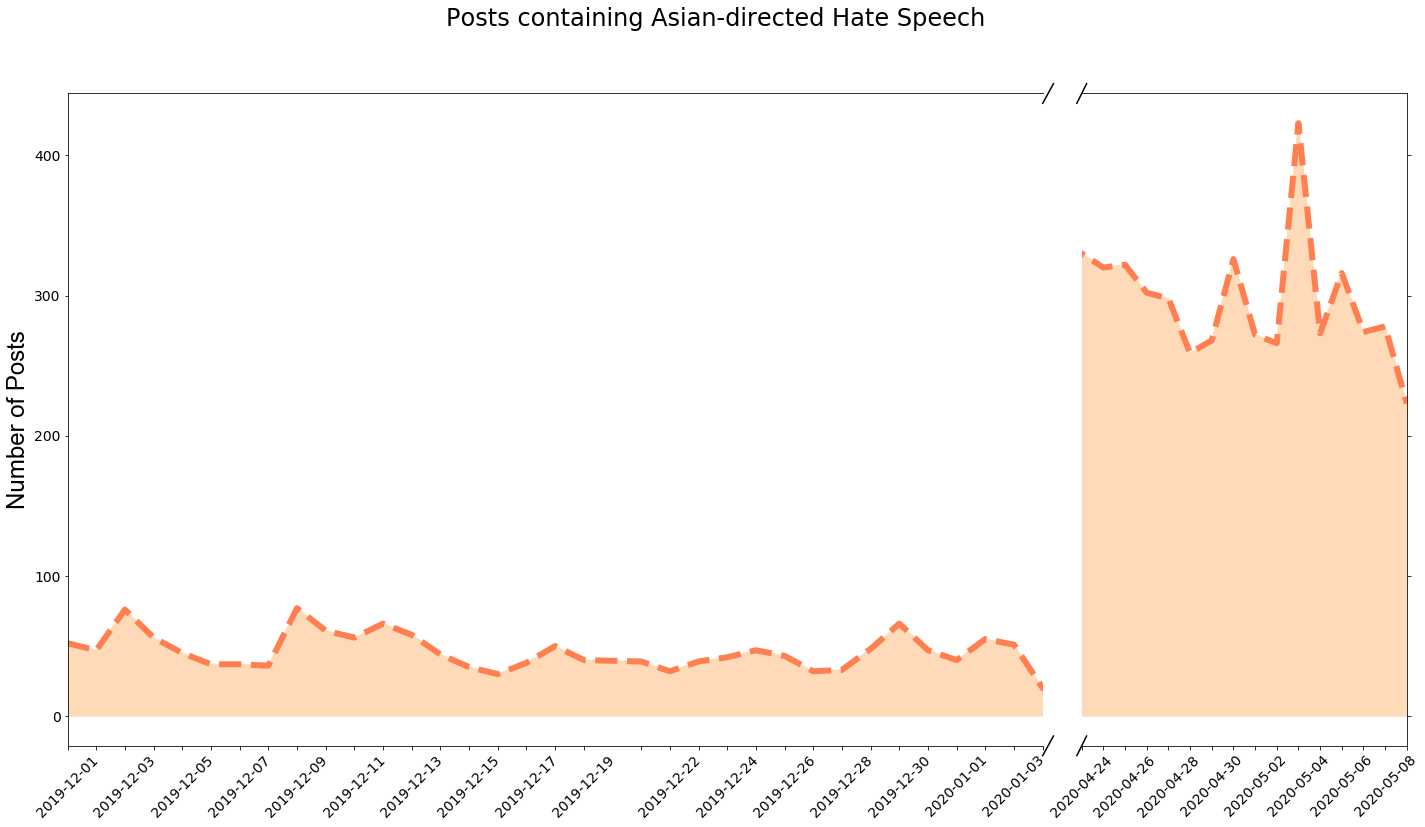

In [37]:
fig, (ax, ax2) = plt.subplots(1, 2, sharey = True, figsize=(24,12),gridspec_kw={'width_ratios': [3, 1]})


fig.subplots_adjust(wspace=0.06)





xlabel1 = x[0:34]
x_cutlabel1 = []
for date in xlabel1:
    x_cutlabel1.append(str(date).split()[0])

xlabel2 = x[34:]

x_cutlabel2 = []
for date in xlabel2:
    x_cutlabel2.append(str(date).split()[0])

ax.plot_date(x, y, 'k--', color = "coral",linewidth=6)
ax2.plot_date(x, y, 'k--', color = "coral",linewidth=6)

ax.fill_between(x, y, color='peachpuff')
ax2.fill_between(x, y, color='peachpuff')

ax.set_xlim([pd.to_datetime('2019-12-01 00:00:00'), pd.to_datetime('2020-01-04 00:00:00')])
ax2.set_xlim([pd.to_datetime('2020-04-24 00:00:00'), pd.to_datetime('2020-05-09 00:00:00')])



ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.yaxis.tick_left()
ax2.yaxis.tick_right()

ax.set_xticks(xlabel1)
ax2.set_xticks(xlabel2)


ax.set_xticklabels(x_cutlabel1, rotation=45)
ax2.set_xticklabels(x_cutlabel2, rotation=45)

axis_font = {'fontname':'Arial', 'size':'24'}


ax.set_ylabel("Number of Posts", **axis_font)
ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % 2 != 0:
        label.set_visible(False)

for index, label in enumerate(ax2.xaxis.get_ticklabels()):
    if index % 2 != 0:
        label.set_visible(False)
        

d = .015 # how big to make the diagonal lines in axes coordinates

d1 = d
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)

fig.suptitle('Posts containing Asian-directed Hate Speech', fontsize = 24)


ax.plot((1,1+d-0.004), (-d1,+d1), **kwargs)

ax.plot((1,1+d-0.004),(1-d1,1+d1), **kwargs)
print((-d,+d), (1-d,1+d))

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)
plt.show()

fig.savefig("covid-19.pdf")


